In [1]:
#data manipulation
import pandas as pd
import numpy as np


#plotting
import matplotlib.pyplot as plt
import seaborn as sns


#machine learning
from sklearn.preprocessing import StandardScaler   #standardscaler
from sklearn.preprocessing import OrdinalEncoder   #ordinalencoder
from sklearn.compose import ColumnTransformer      #transform everything
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans                  #clustering with kmeans
from sklearn.cluster import AgglomerativeClustering #hierchical clustering 
from sklearn.cluster import DBSCAN                  #dbscan clustering

sns.set(style='darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv', 
                 index_col='CustomerID',
                 dtype={'Gender':'category',          #change the default data types to save some memory
                        'Annual Income (k$)':'int16', 
                        'Age':'int8',
                        'Spending Score (1-100)':'int8'})

In [3]:
#first five columns of the dataframe
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
#shape of the dataframe
df.shape

(200, 4)

In [5]:
df.info()      #no null-values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int8    
 2   Annual Income (k$)      200 non-null    int16   
 3   Spending Score (1-100)  200 non-null    int8    
dtypes: category(1), int16(1), int8(2)
memory usage: 2.6 KB


In [6]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


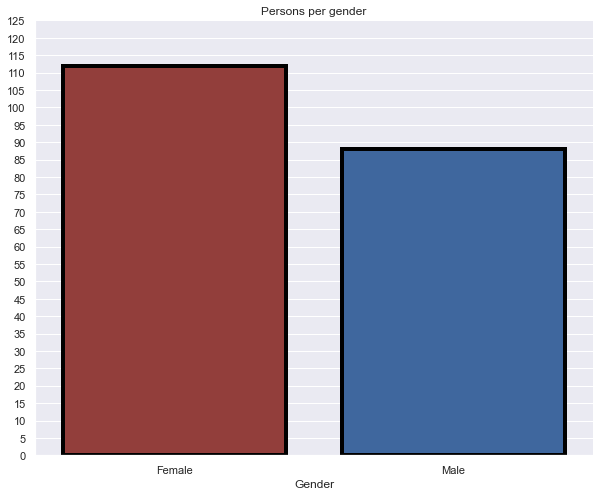

In [7]:
#genres's countplot of the customers

ax = sns.countplot(x='Gender', data=df, palette=["#a1302c", "#2f64ae"], 
                   edgecolor=['#000000', '#000000'], linewidth=4)        #create ax object
ax.figure.set_size_inches(10, 8)                                 #change size
ax.set(xlabel='Gender', ylabel='', title='Persons per gender')   #label names and title
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(0, 130, 5))                              #change ticks of the y label

plt.show()

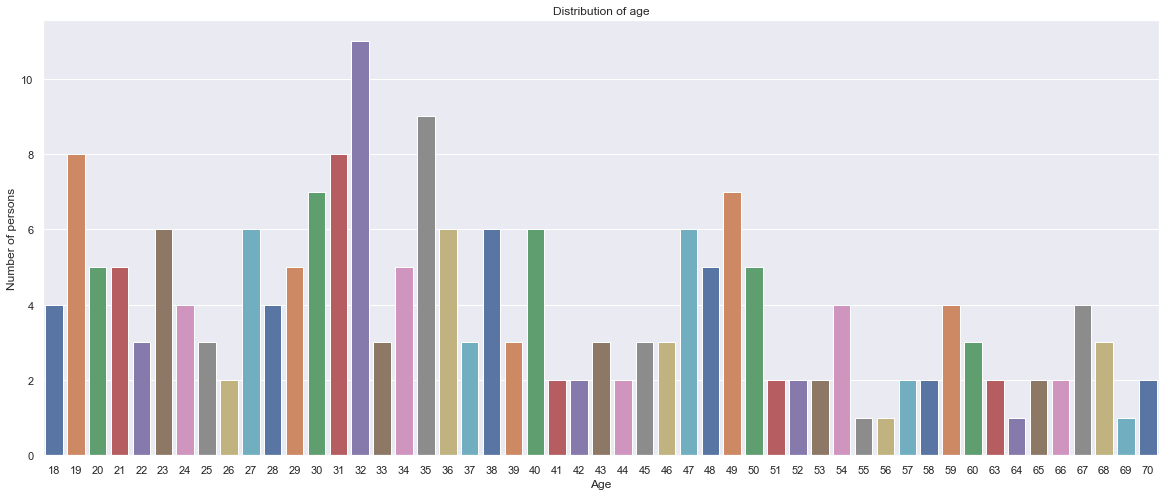

In [8]:
#distribution of age
ax = sns.countplot(x='Age', data=df, palette='deep')     #countplot
ax.set(title='Distribution of age', ylabel='Number of persons')   
ax.figure.set_size_inches(20,8)


plt.show()

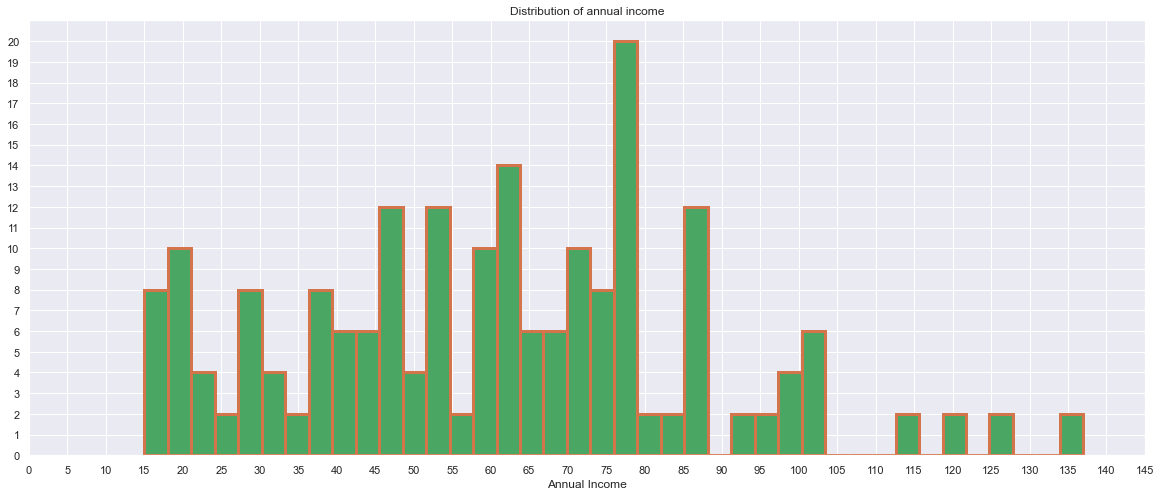

In [9]:
#distribution of annual income

ax = sns.distplot(a=df['Annual Income (k$)'], bins=40, kde=False,   #40 bins, no kde
                  hist_kws = {'color':'#4aa763',
                              'edgecolor':'#d4744b',
                              'linewidth':3,
                              'linestyle':'-',
                              'alpha':1})
ax.figure.set_size_inches(20,8)  
ax.set_xticks(np.arange(0, 150, 5))    #from 0 to 150 w
ax.set_yticks(np.arange(0, 21, 1))
ax.set(title='Distribution of annual income', xlabel='Annual Income')

plt.show()

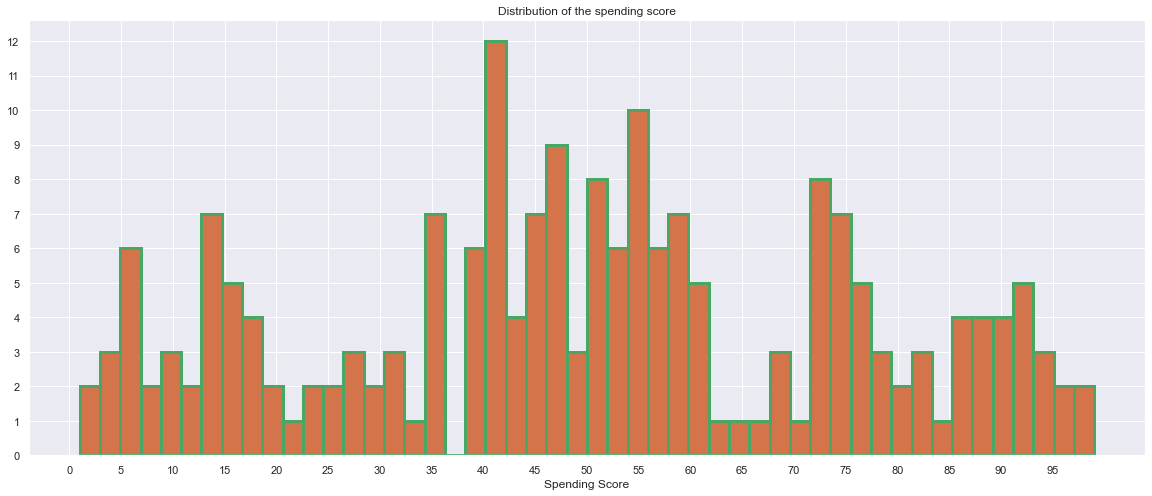

In [10]:
#Spending score distribution

ax = sns.distplot(a = df['Spending Score (1-100)'], kde=False, bins=50,  #50 bins, no kde
                  hist_kws = {'color':'#d4744b',                 
                              'edgecolor':'#4aa763',
                              'linewidth':3, 
                              'linestyle':'-',
                              'alpha':1})        
ax.figure.set_size_inches(20, 8)       
ax.set_xticks(np.arange(0, 100, 5))                  #set xticks from 0 to 100 with a 5 step
ax.set_yticks(np.arange(0, 13, 1))                   #set yticks from 0 to 13 with a 1 step
ax.set(title='Distribution of the spending score', xlabel='Spending Score')

plt.show()

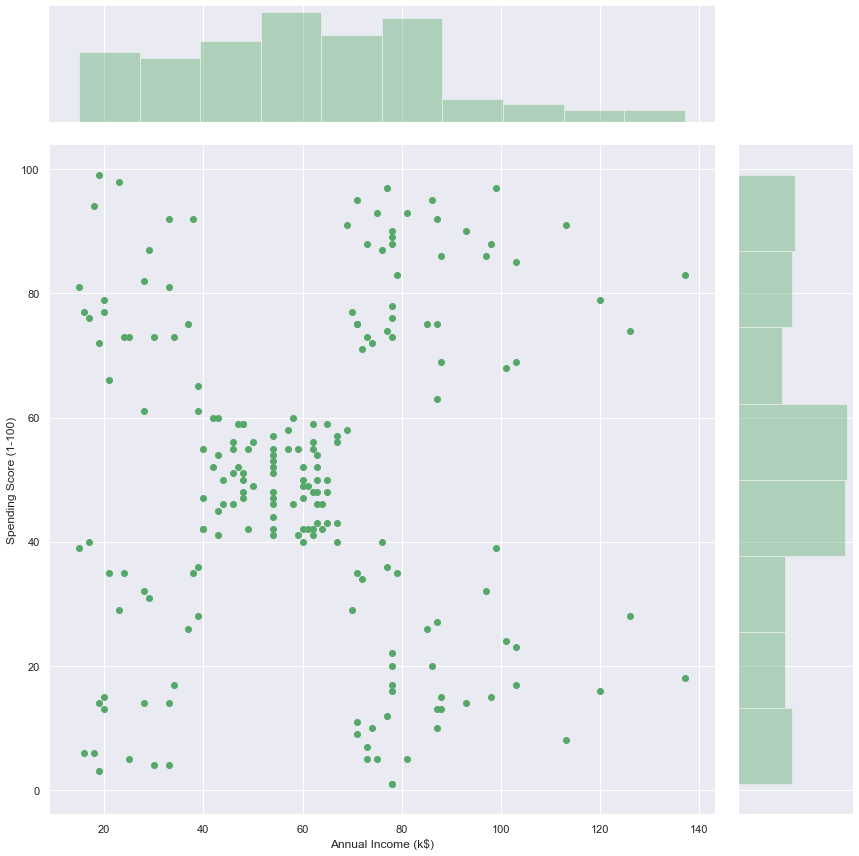

In [11]:
#joint distribution of annual income vs spending score

ax = sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)',   
                   data=df, kind='scatter', height=12,color='g')


plt.show()

Seems like we could have 3-6 different types of customers.

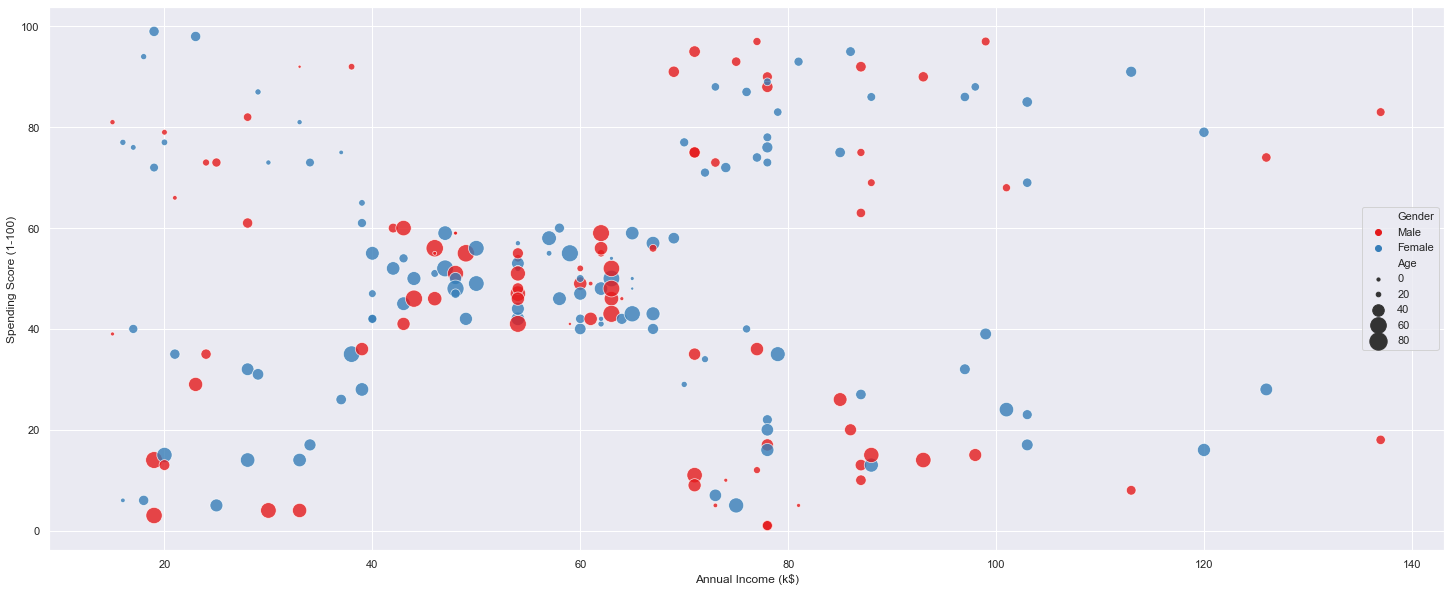

In [12]:
ax = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, 
                     hue='Gender', size='Age',
                     sizes=(10,300), palette='Set1', alpha=0.8)
ax.figure.set_size_inches(25,10)


plt.show()

Seems like most of the younger people are in the two upper groups. Seems like sex isn't a big factor here.

There's a group with a low annual income that spens a lot of money who also appear to be quite young, probably their parents pay for the stuff. 

Compare this last group to the one below them, they seem to earn the same amount of money and spend a lot less, the main difference seems to be the age, this group is a little bit older.

Bigger group is in the middle and most of it's members seem to be adults around 40 years old.


Last two groups differ in the spending score and the age, young people who earn a lot of money are spending it while the other group is older and are spending a lot less.

# Clustering analysis

We begin with k-means clustering.

In [13]:
pipeline = ColumnTransformer([
    ('standard', StandardScaler(), ['Annual Income (k$)', 'Spending Score (1-100)']),
    ('encoder', StandardScaler(), ['Age'])])

df_num = pipeline.fit_transform(df)

In [14]:
#fit kmeans fot 1-19 clusters
k_means_num = [KMeans(n_clusters=i, n_init=20, random_state=1, max_iter=150) for i in range(1, 20)]


#inertia for each k
variance_num = [k_means_num[i].fit(df_num).inertia_ for i in range(19)]

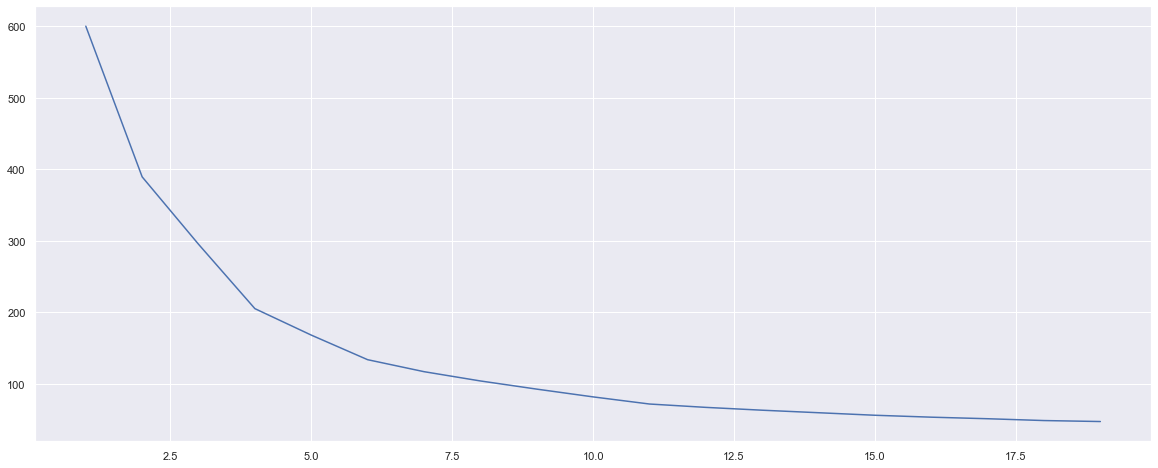

In [15]:
ax = sns.lineplot(x=range(1,20), y=variance_num, dashes=True)
ax.figure.set_size_inches(20,8)

In [16]:
k_means_num_final = KMeans(n_clusters=5, n_init=20, random_state=1, max_iter=150)

k_means_num_final.fit(df_num)

KMeans(max_iter=150, n_clusters=5, n_init=20, random_state=1)

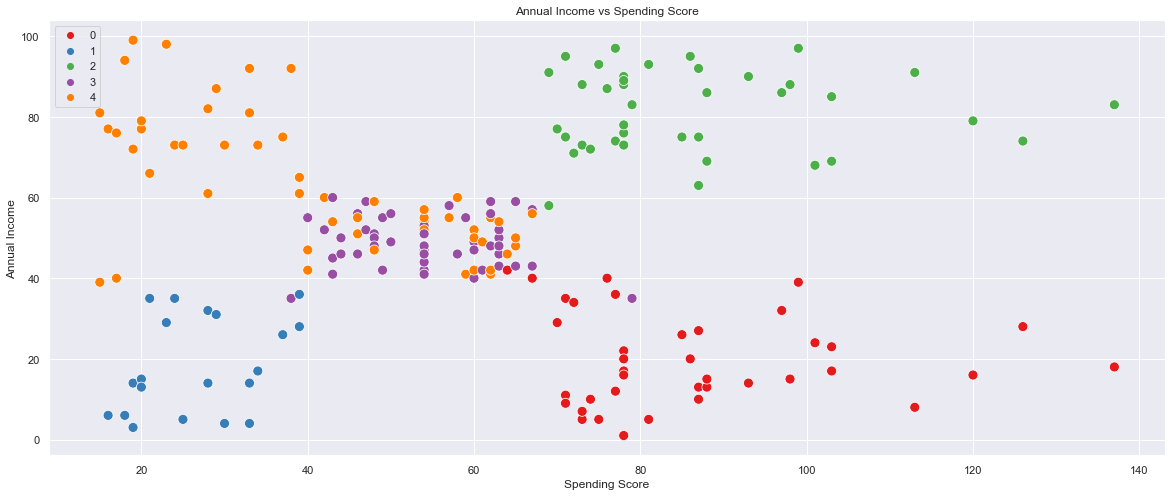

In [17]:
ax = sns.scatterplot(x=df['Annual Income (k$)'], y = df['Spending Score (1-100)'],
                     hue=k_means_num_final.predict(df_num), palette='Set1',
                     sizes=(40,400), alpha=1, s=100)
ax.figure.set_size_inches(20, 8)
ax.set(xlabel='Spending Score', ylabel='Annual Income', title='Annual Income vs Spending Score')


plt.show()

Looks quite good and the plot doesn't consider the age variable.

Now hierchical clustering

In [18]:
def hierarchical_clustering(link, title):
    """Funtion that creates some plots for hierarchical clustering
    
    [link]: linkage 
    [title]: plot title"""
    #1-10 number of clusters
    clustering = [AgglomerativeClustering(linkage = link, n_clusters = i) for i in range(1, 10)]
    #labels for the previous models
    labels = [clustering[i].fit(df_num).labels_ for i in range(0, 9)]
    #silhouette_score for the prevoius models
    df_new = df.drop("Gender", axis = 1)
    sil_scores = [silhouette_score(df_new, labels[i]) for i in range(1, 8)]
    
    
    
    #plot
    fig = plt.figure(figsize=(14, 14))
    title = fig.suptitle("{}".format(title), fontsize=18)
    fig.subplots_adjust(top = 0.95, wspace = 0.3)
    
    
    ax1 = fig.add_subplot(3, 2, 1)
    #scatterplot of spensing score vs annual income
    sns.scatterplot(x = df['Annual Income (k$)'], 
                    y=df['Spending Score (1-100)'],          
                    hue = labels[2], s = 100, alpha = 1,       #hue corresponds to the model with 3 clusters
                    palette = "Set1")
    ax1.set(title = "3 clusters", ylabel = "", xlabel = "")

    
    ax2 = fig.add_subplot(3, 2, 2) 
    sns.scatterplot(x = df['Annual Income (k$)'], 
                    y = df["Spending Score (1-100)"],
                    hue = labels[3], s = 100, alpha = 1,
                    palette = "Set2")
    ax2.set(title = "4 clusters", ylabel = "", xlabel = "")
    
    
    ax3 = fig.add_subplot(3, 2, 3)
    sns.scatterplot(x = df['Annual Income (k$)'],
                    y = df['Spending Score (1-100)'],
                    hue = labels[4], s = 100, alpha = 1,
                    palette = "Set3")
    ax3.set(title = "5 clusters", ylabel = "", xlabel = "")
    
    
    ax4 = fig.add_subplot(3, 2, 4)
    sns.scatterplot(x = df["Annual Income (k$)"],
                    y = df["Spending Score (1-100)"], 
                    hue = labels[5], s = 100, alpha = 1,
                    palette = "deep")
    ax4.set(title = "6 clusters", ylabel = "", xlabel = "")
    
    
    ax5 = fig.add_subplot(3, 2, 5)
    sns.scatterplot(x = df['Annual Income (k$)'], 
                    y = df['Spending Score (1-100)'],
                    hue = labels[6], s = 100, alpha = 1, 
                    palette = 'bright')
    ax5.set(title = "7 clusters", xlabel = '', ylabel = "")
    
    
    ax6 = fig.add_subplot(3, 2, 6)
    sns.lineplot(x = range(2, 9), y = sil_scores, dashes = True)

    
    plt.show()

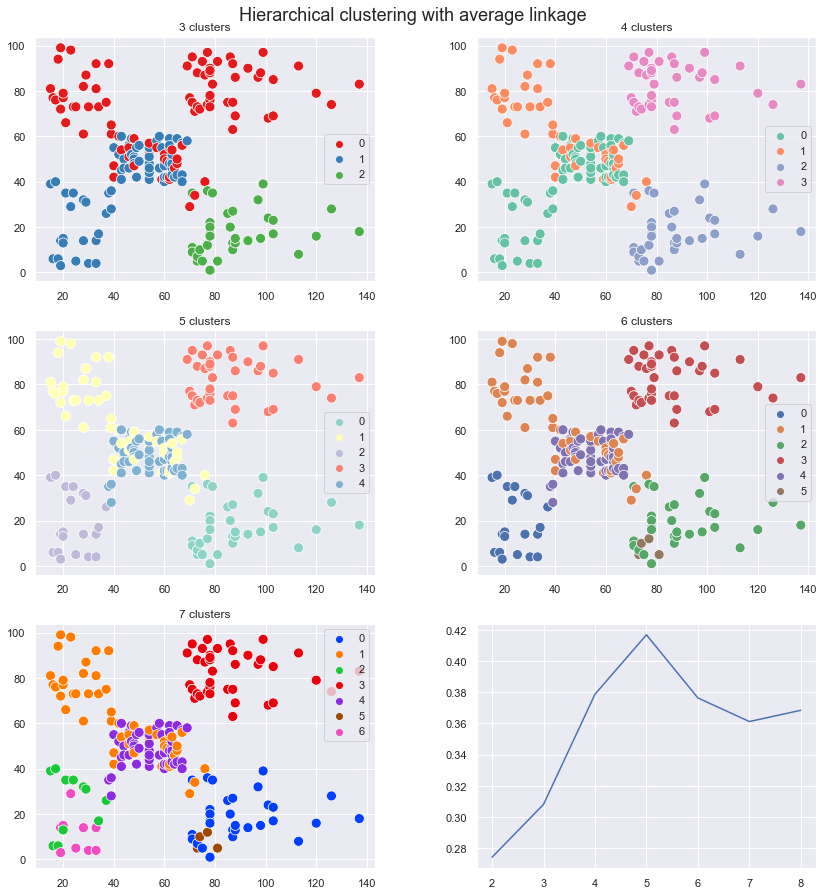

In [19]:
hierarchical_clustering('average', 'Hierarchical clustering with average linkage')

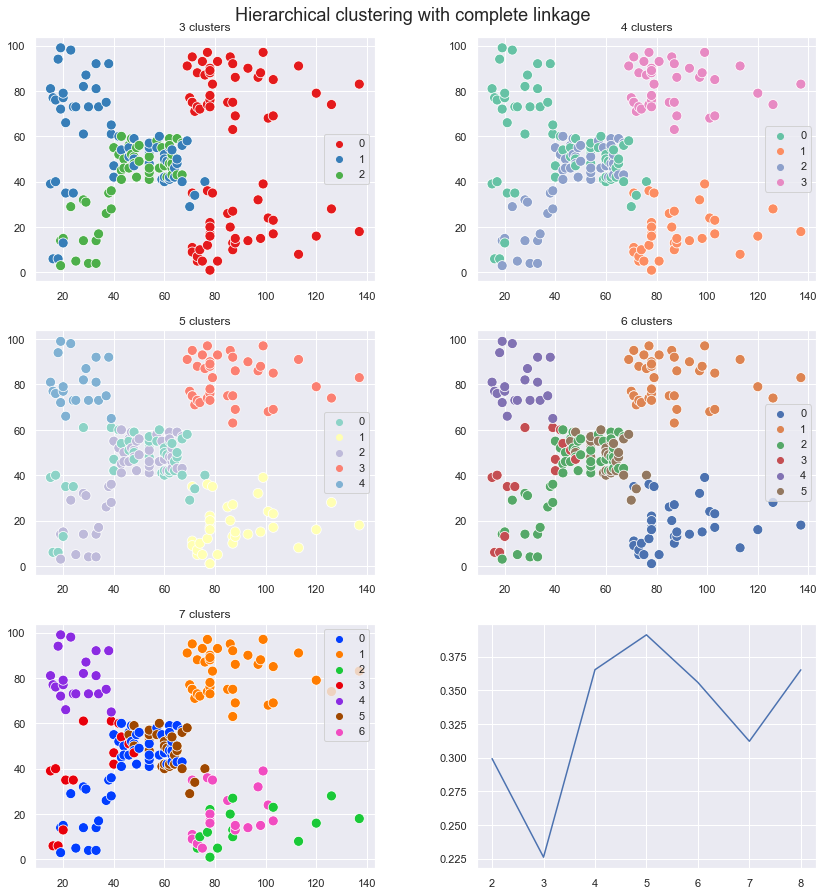

In [20]:
hierarchical_clustering('complete', 'Hierarchical clustering with complete linkage')

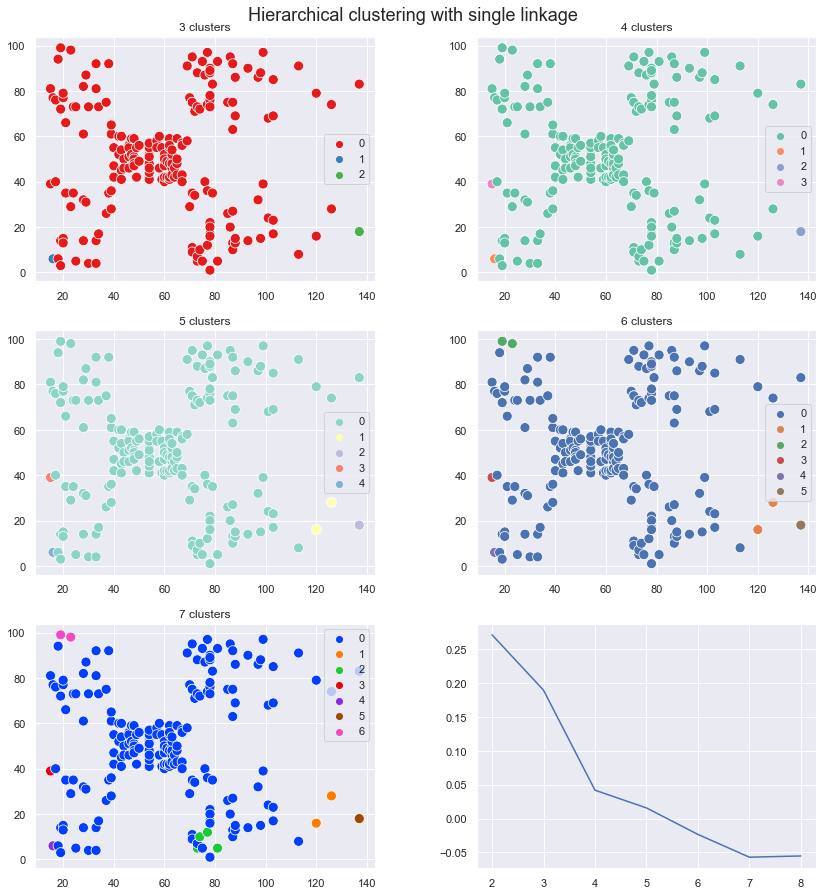

In [21]:
hierarchical_clustering('single', 'Hierarchical clustering with single linkage')

Something weird is going on here.

Seems like 5 clusters with average linkage is the best model here.

In [22]:
hier_clustering_final = AgglomerativeClustering(n_clusters = 5, linkage = "average")
hier_clustering_final.fit(df_num)

AgglomerativeClustering(linkage='average', n_clusters=5)